<a href="https://colab.research.google.com/github/g8428/TIL/blob/master/220216_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

$\ 1/2 \sum_{i=1}^n (y_i-t_i)^2$

In [5]:
def sum_sqaures_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [6]:
sum_sqaures_error(np.array(y), np.array(t))

0.09750000000000003

In [7]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_sqaures_error(np.array(y), np.array(t))

0.2725



```
# 코드로 형식 지정됨
```

# 교차 엔트로피

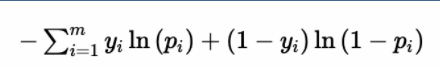

In [8]:
def cross_entopy(Y, P):
    Y = np.array(Y)
    P = np.array(P)
    
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P)).round(3)

In [9]:
P = [[0.6, 0.2, 0.9, 0.3], [0.7, 0.9, 0.2, 0.4]]
Y = [[1., 1., 0., 0.], [1., 1., 0., 0.]]

for p, y in zip(P, Y):
    print(cross_entopy(y, p))

4.78
1.196


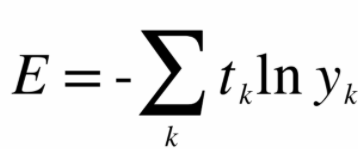

In [10]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [11]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [12]:
y = [0.1, 0.05, 0.4, 0.0, 0.05, 0.1, 0.0, 0.3, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.9162904818741863

In [13]:
np.array(y)

array([0.1 , 0.05, 0.4 , 0.  , 0.05, 0.1 , 0.  , 0.3 , 0.  , 0.  ])

In [71]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]

    delta = 1e-7
    return -np.sum(t * np.log(y + delta))/batch_size

In [15]:
y = [[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0], [0.1, 0.5, 0.2, 0.0, 0.05, 0.1, 0.0, 0.05, 0.0, 0.1]]
t = [[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0,  0, 0, 0, 1, 0, 0, 0, 0]]

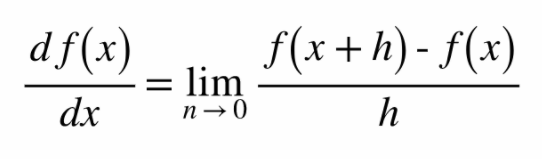

- 미분식

In [24]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x + h) - f(x))/h

조금 더 정확한 방법

In [27]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x + h) - f(x-h))/(2*h)

In [25]:
def func_1(x):
    return 0.01*x**2 + 0.1*x

In [26]:
numerical_diff(func_1, 5)

0.20000099999917254

In [28]:
numerical_diff(func_1, 5)

0.1999999999990898

- 그림으로 표현

In [29]:
import matplotlib.pylab as plt

In [30]:
def tangent_line(f,x):
    d = numerical_diff(f,x)
    y = f(x) - d*x
    return lambda t : d*t + y

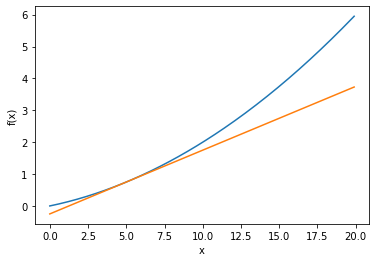

In [32]:
x = np.arange(0.0, 20.0, 0.1)
y = func_1(x)

tf = tangent_line(func_1,5)
y2 = tf(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.plot(x,y2)
plt.show();

- 이제 경사하강법을 써보자
    - w값이 작아지는 방향으로 업데이트 하면서 최저값 찾기

In [33]:
def func_2(x):
    return x[0]**2 + x[1]**2

In [35]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    # (f(x+h) - f(x-h)) / (2 * h) 를 미분한다
    # x[0], x[1]일 때의 편미분 for 반복
    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 
        x[idx]= float(tmp_val) + h
        fxh1 = f(x)
        # f(x-h)
        x[idx] = float(tmp_val) - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

In [36]:
numerical_gradient(func_2, np.array([3.0,4.0]))

array([6., 8.])

In [37]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())

        grad = numerical_gradient(f,x)
        x -= lr * grad
    
    return x, np.array(x_history)
    

In [58]:
init_x = np.array([-3.0,4.0])

lr = 0.1
step_num = 100

x, x_history = gradient_descent(func_2, init_x, lr=lr,step_num=step_num)

In [59]:
x

array([-6.11110793e-10,  8.14814391e-10])

In [ ]:
x_history

## 단순신경망 구현

In [75]:
def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = sum(exp_x)
    y = exp_x / sum_exp_x

    return y

In [61]:
def numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    # (f(x+h) - f(x-h)) / (2 * h) 를 미분한다
    # x[0], x[1]일 때의 편미분 for 반복
    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 
        x[idx]= float(tmp_val) + h
        fxh1 = f(x)
        # f(x-h)
        x[idx] = float(tmp_val) - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

In [62]:
def numerical_gradient(f, X):
    if X.ndim ==1:
        return numerical_gradient_no_batch(f,X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_no_batch(f,x)

        return grad

X -> y : logit -> softmax를 통해 표준화 -> 라벨링(예측)(cross entropy)

- 단층 퍼셉트론 만들기 $y=aW+b$

In [73]:
# 퍼셉트론 객체 생성
class SimpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
    
    def predict(self, x):
        return np.dot(x,self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [64]:
net = SimpleNet()
net.W

array([[-1.63917021, -0.05281892, -0.12695625],
       [-0.69746301, -0.23261013, -1.0840369 ]])

In [65]:
x= np.array([0.6, 0.9])

In [66]:
p = net.predict(x)
p

array([-1.61121883, -0.24104046, -1.05180696])

In [67]:
np.argmax(p)

1

In [90]:
# 잔차 확인
t = np.array([0,0,1])
net.loss(x, t)

1.3394977917939872

In [78]:
def f(W):
    return net.loss(x,t)

# f는 목적함수. 목적함수에 대해 W를 한 번 미분
dw = numerical_gradient(f, net.W)
dw

array([[ 0.0897438 ,  0.35323634, -0.44298014],
       [ 0.1346157 ,  0.5298545 , -0.66447021]])

In [102]:
dw = numerical_gradient(lambda w : net.loss(x,t), net.W)
dw

array([[ 0.089759  ,  0.35255038, -0.44230938],
       [ 0.1346385 ,  0.52882557, -0.66346407]])

In [103]:
# W값 업데이트
net.W -= 0.001 * dw

In [84]:
net.W

array([[-1.63915996, -0.05317215, -0.12651327],
       [-0.69759763, -0.23313998, -1.08337243]])

In [86]:
p = net.predict(x)
p

array([-1.61133384, -0.24172927, -1.05094315])

In [87]:
np.argmax(p)

1

In [104]:
# W 업데이트 후 loss 값 감소 확인 - 잔차 감소
net.loss(x, t)

1.335229606944324

In [114]:
for i in range(100):
    dw = numerical_gradient(lambda w : net.loss(x,t), net.W)
    net.W -= 0.001 * dw
    net.loss(x,t)
net.loss(x,t)

1.1320801689769173